<a href="https://colab.research.google.com/github/fmejias/CienciasDeLosDatosTEC/blob/master/TP0/TP0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matemáticas para Ciencias de los Datos:
# Trabajo práctico 0

- Professor: M.Sc.Saul Calderon.

- Students: 
    - María Auxiliadora Mora, Instituto Tecnológico de Costa Rica  
    - Felipe Alberto Mejías Loría, Instituto Tecnológico de Costa Rica. 

- May 15th, 2019   

# 1) Sistemas lineales (20 puntos)
Scaling 
$$
 L\{\alpha f(x)\}= \alpha L\{f(x)\}
$$
Superposition
$$
 L\{f_1(x)+f_2(x)\}= L\{f_1(x)\}+L\{f_2(x)\}
$$

An operator $L\{\cdot\}$ with input functions $f$ with input variable $x \in \mathbb{R}$, with $\alpha, \beta \in \mathbb{R}$, define  a lineal system if:

$$
 L\{\alpha f_1(x)+\beta f_2(x)\}= \alpha L\{f_1(x)\}+\beta L\{f_2(x)\}
$$

# Exercise 1.1

In [0]:
# Libraries required for the exercises
import torch as torch
from torch.autograd import Variable

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [0]:
# Operators definition. 

def linealFunction(x, h):
  """
  Sample lineal function
  param x: input array
  return y: x + 2
  """
  y = x + 2
  return y;


def multiplication(x, h):
  """
  Sample multiplication function
  param x: input arrays
  param h: any function
  return y: x * h
  """
  y = x * h

  return y;


def max(x, h):
  """
  Sample max function
  param x: input arrays
  return y: max(x)
  """
  y = torch.max(x)

  return y;


def differentiation(x, h):
  """
  OJOJOJOJOJOJO Aun no esta bien! Hay que investigar cómo calcular la derivada.  
  Sample differentiation function
  param x: input arrays  
  return h: grad(x)
  """
  y = x.cos()
  y.backward()
  h=x.grad
  return h;



def abs(x, h):
  """
  Sample absolute value function
  param x: input arrays
  return y: abs(x)
  """
  y = torch.abs(x)

  return y;


In [0]:
#Test. BORRAR.  El grad es acumulativo! por eso no funciona. Hay que ver como se hace!
x = torch.randn(1, requires_grad=True); 
print(x)
y = x.cos()
y.backward()
h=x.grad
print(h)

tensor([-1.0185], requires_grad=True)
tensor([0.8513])


In [0]:
# Verification of operators linearity.

def checkLinearity(operator, exerc):
  
  # Create series of random values for exerc 1.1 and 1.2
  if exerc == 1:
    # Vector definition for exerc 1.1
     x = torch.randn(50)
  
     if operator == 'differentiation':
        x = torch.randn(1, requires_grad=True) 
  elif exerc == 2:
     # Matrix definition for exerc 1.2
     x = torch.randn(50, 50)

  
  #sample scalars
  alpha = torch.randn(1,1)
  beta = torch.randn(1,1)
  
  #sample functions
  f1 = lambda x: x + 2
  f2 = lambda x: x * x
  h  = lambda x: x + 3
  
  #compute left and right side of the equation
  right = alpha * operator(f1(x), h(x)) + beta * operator(f2(x), h(x))
  left = operator(alpha * f1(x) + beta * f2(x), h(x))
  
  difference = torch.abs(right - left)
  
  
  sumDifference = difference.sum()
  #Is linear?
  return (sumDifference < 0.0001)
  

In [15]:
## Test exercise 1.1

print("a) g (t) = u(t) + 2 ", checkLinearity(linealFunction, 1))

print("b) g (t) = u(t) h(t) ", checkLinearity(multiplication, 1))

print("c) g (t) = máx (u(t)) ", checkLinearity(max, 1))

# print("d) g (t) = u' 0 (t) ", checkLinearity(differentiation, 1))  Aun no funciona.

print("e) g (t) = |u(t)| ", checkLinearity(abs, 1))


a) g (t) = u(t) + 2  tensor(0, dtype=torch.uint8)
b) g (t) = u(t) h(t)  tensor(1, dtype=torch.uint8)
c) g (t) = máx (u(t))  tensor(0, dtype=torch.uint8)
e) g (t) = |u(t)|  tensor(0, dtype=torch.uint8)


# Exercise 1.2.

In [0]:
# Operators definition. 

def normL1(x, h):
  """
  Sample l1-norm function
  param x: input array
  return y: l1-norm of x
  """
  y = torch.norm(x, p=1, dim=None)
  return y

def normL2(x, h):
  """
  Sample l2-norm function
  param x: input array
  return y: l2-norm of x
  """
  y = torch.norm(x, p=2, dim=None)
  return y

def max(x, h):
  """
  Sample infinite-norm function
  param x: input array
  return y: the maximun absolute value of x
  """
  y = torch.max(x.abs())
  return y

In [17]:
## Tests exercise 1.2

print("a) Norma de Manhattan L1 ", checkLinearity(normL1, 2))
print("b) Norma Euclidiana L2 ", checkLinearity(normL2, 2))
#print("Falta c) Norma L∞ ", checkLinearity(max, 2))
#print("Falta la d) ", checkLinearity(max, 2))



a) Norma de Manhattan L1  tensor(0, dtype=torch.uint8)
b) Norma Euclidiana L2  tensor(0, dtype=torch.uint8)


In [18]:
##Pruebas.  Borrar
a = torch.randn(50,50)
print(a)
b = torch.norm(a, p=1, dim=None)
torch.sum(b)

tensor([[ 0.5994,  2.6565,  2.0418,  ...,  0.7955,  1.6037,  1.1626],
        [ 0.3159,  1.2368, -0.1286,  ..., -0.1374,  0.2011, -0.9217],
        [ 2.7698, -0.2767,  0.6958,  ..., -2.8644,  0.0798,  0.7865],
        ...,
        [ 2.1568, -1.0944, -0.7078,  ..., -0.8364,  0.7863, -1.6533],
        [-0.6313, -1.3523,  0.0946,  ..., -1.4873,  0.7932, -0.2452],
        [ 2.0062,  0.6417, -1.2278,  ..., -0.4847, -1.1463, -1.1122]])


tensor(2001.9570)

In [19]:
a = torch.randn(5,5)
print (a.abs())
b = torch.max(a.abs())
print(b)

tensor([[0.0721, 0.7089, 1.1157, 0.3060, 0.3580],
        [0.6896, 0.0284, 0.1658, 0.4452, 1.3646],
        [0.2895, 0.5826, 1.7424, 0.5543, 0.9593],
        [0.1449, 0.6205, 1.1649, 0.6909, 0.5109],
        [0.6425, 0.1904, 0.8006, 0.1970, 1.2461]])
tensor(1.7424)


# Vectores (20 puntos)
a) Usando Python (quiver3) grafique los siguientes vectores 

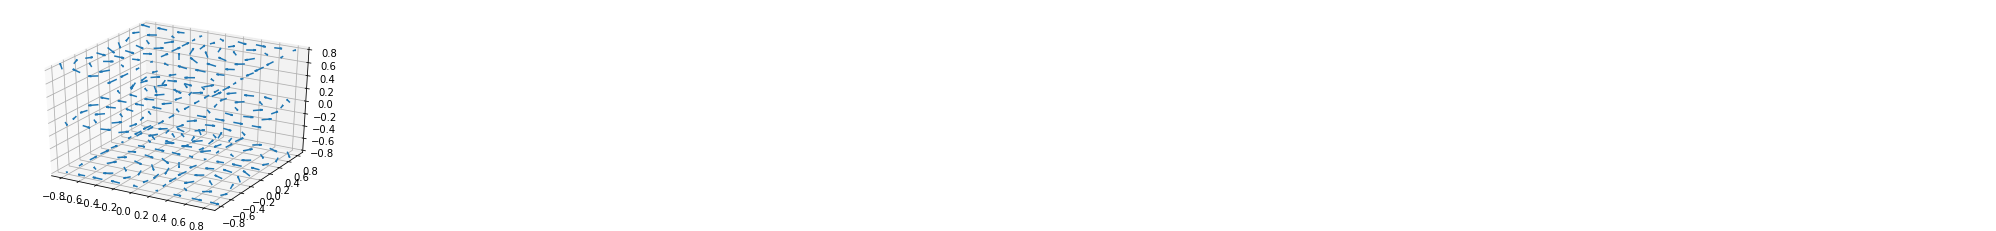

In [0]:
# https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#quiver
#from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

# Make the direction data for the arrows
u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))

ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True)

plt.show()

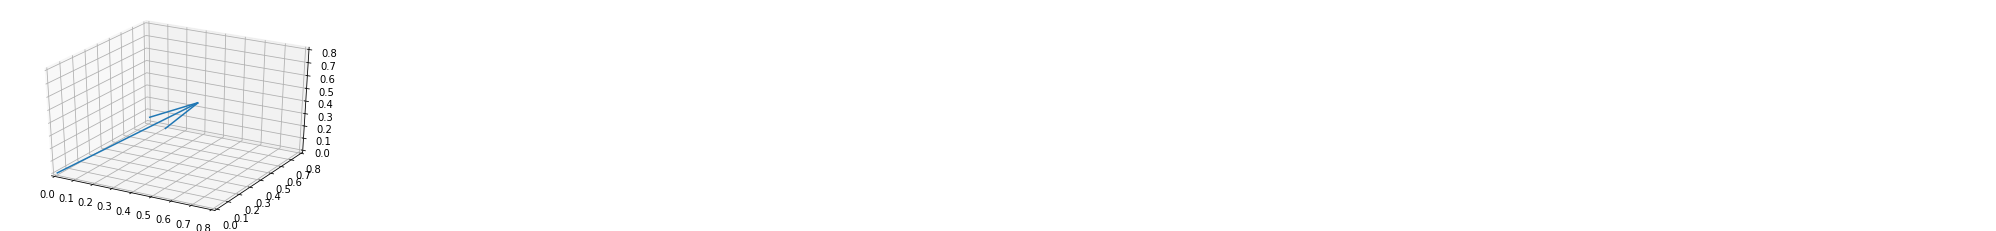

In [0]:
# Quiver ejemplo original 
#https://stackoverflow.com/questions/43524048/using-quiver-in-python-to-plot-a-3d-vector
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlim3d(0, 0.8)
ax.set_ylim3d(0, 0.8)
ax.set_zlim3d(0, 0.8)
ax.quiver(0, 0, 0, 1, 1, 1, length = 0.8, normalize = True)
plt.show()

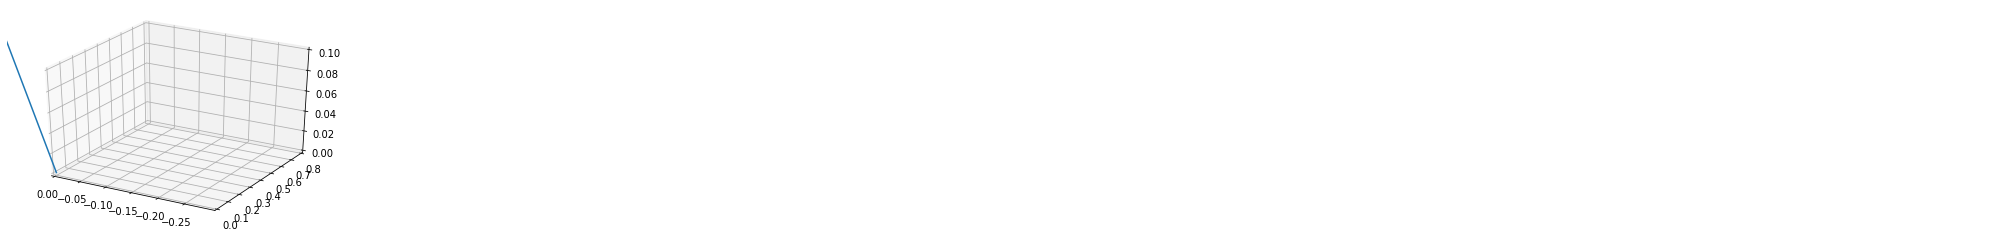

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

a = 1/np.sqrt(2)

ax.set_xlim3d(0, -0.3)
ax.set_ylim3d(0, 0.8)
ax.set_zlim3d( 0, 0.1)
ax.quiver(0, 0, 0, 1, 1, 1, length = 0.5, normalize = True)
plt.show()

## Dot product

The dot product between to matrices $A\in \mathbb{R}^{2\times3}$ and $B \in \mathbb{R}^{3\times2}$, and vectors $w \in \mathbb{R}^{1\times3}$ and $v \in \mathbb{R}^{1\times3}$, is calculated as follows:

In [0]:
def calculateAngleVectors(w, v):
 
  
#Select device
device = torch.device("cpu") 
# device = torch.device("cuda:0")


#create literal tensors
w = torch.tensor([1, 2, 3], device = device)
v = torch.tensor([5, 6, 7], device = device)
#create an array with values between X and Y, with a step of D
series = torch.arange(-1.0, 1.0, 0.01)




#.0 to ensure float tensors
a = torch.tensor([1.0, 0.0])
b = torch.tensor([0.0, 1.0])
#calculate angle between vectors
angle = calculateAngleVectors(a, b)
print("Angle between vectors: ", angle)

#random numbers
y = torch.randn(1, 3, dtype = torch.float)
#vector of ones
x = torch.ones(1,3, dtype = torch.float)

#to get tensor dimensions, we use shape
print(w.shape)
#Dot product
dotProduct = w.dot(v)
print("Dot product: ", dotProduct)
print(y)

IndentationError: expected an indented block (<ipython-input-365-c7b0b1c4cb95>, line 5)

In [0]:
v = torch.tensor([1.0, 2.0, 4.0])
a = torch.tensor([2.0, 2.0, 2.0])
w = torch.randn(1, 3)
c = v * a
serie = torch.arange(-1.0, 1.0, 0.1)
print(c)
print(c.shape)

tensor([2., 4., 8.])
torch.Size([3])


## Plot Hiperplane

To plot hiperplane given with input $\vec{x}, \vec{m}  \in \mathbb{R}^{3} $, including the bias


$$
 z = f(\vec{x}) = \vec{m} \cdot \vec{x}  $$

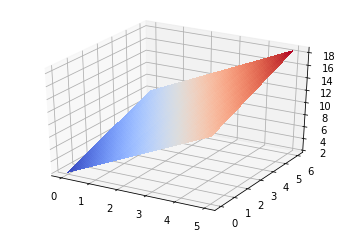

In [0]:
figure = plt.figure()
figureSurface = figure.gca(projection = '3d')
#create 1D tensors
x = torch.arange(0.0, 5.0, 0.01)
y = torch.arange(0.0, 6.0, 0.01)
#Create 2D tensors with variation along the two axis
X,Y = torch.meshgrid(x, y)
#compute hiperplane function
Z = 2.1 * X + Y + 2
#create figure surface
surface = figureSurface.plot_surface(X.numpy(), Y.numpy(), Z.numpy(), cmap = cm.coolwarm,
                       linewidth=0, antialiased=False)
#
plt.show()





##Porting vectors (1D tensors) to matrices (2D tensors)

We usually work with 2D tensors, thus is frequent to convert them to 2d tensors:

In [0]:
#row vector in 2D tensor
w2Drow = w.reshape(-1, w.shape[0])
#column vector in 2D tensor, -1 for n rows or columns
v2Dcolumn = v.reshape(v.shape[0], -1)
print(w2Drow)
print(v2Dcolumn)
# Dot product of matrices doesnt exist for 2D Tensors
A = torch.tensor([[1, 2, 3],[1, 2, 3]])
B = torch.tensor([[5, 5],[6, 6],[7, 7]])
#WE RECOMMEND ALWAYS USE 2D TENSORS, EVEN IF IT IS A VECTOR
#dotProduct = A.dot(B) it doesnt work, it is defined for 1D tensors only. 
#SOME OPERATORS ARE DEFINED FOR 1D TENSORS ONLY, AND SOME OF THEM ARE DEFINED FOR 2D TENSORS



tensor([[1, 2, 3]])
tensor([[5],
        [6],
        [7]])


## Matrix indexing and concatenation
Tensors can be indexed using the slicing operators, and concatenated using the function cat

In [0]:
#Create a matrix C, concatenating the matrix A along its rows
C = torch.cat((A, A), 0)
#Create a matrix D, concatenating the matrix A along its columns
D = torch.cat((B, B), 1)

#Put ceros in column 1 and 2, from row 0
C[0, 1:3] = 0;
print(C)


#Put ones in column 1 and all the rows
D[:, 1] = 1
print(D)


tensor([[1, 0, 0],
        [1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])
tensor([[5, 1, 5, 5],
        [6, 1, 6, 6],
        [7, 1, 7, 7]])


## Matrix flatenning
Matrix flatenning refers to create a column or row vector with all the elements within a matrix.
See more at http://deeplizard.com/learn/video/fCVuiW9AFzY

In [0]:
Af= A.reshape(A.shape[0] * A.shape[1], -1)
print(Af)

#if we want to remove one dimension of the tensor, we can use squeeze, transforming from 2D to 1D tensor
Afs = Af.squeeze()
print(Afs)



tensor([[1],
        [2],
        [3],
        [1],
        [2],
        [3]])
tensor([1, 2, 3, 1, 2, 3])


## Matrix Transpose
The transpose operation is only defined for 2D tensors

In [0]:
#transpose receives the first dim0 to switch, and the second dim1 to swap, usually 0,1 is the order
wDrowT = w2Drow.transpose(0, 1)
v2DcolumnT = v2Dcolumn.transpose(0, 1)
print(wDrowT)
print(v2Dcolumn)

tensor([[1],
        [2],
        [3]])
tensor([[5],
        [6],
        [7]])


## Vector plotting
To plot a vector, we need to transform the pytorch tensors to numpy arrays, since most libraries use numpy. 
We build a matrix with a vector per row

[[1 2 3]
 [5 6 7]]


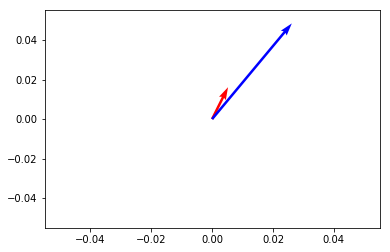

In [0]:
#convert tensors to 2D numpy arrays 
#tensor.numpy() converts a tensor to a numpy array
#reshape creates a 2D numpy array, by taking all the rows (-1 parameter), and the 3 columns of the vector
wNumpy = w.numpy().reshape(-1, w.shape[0])
vNumpy = v.numpy().reshape(-1, v.shape[0])
#concatenate(tuple, axis) takes a tuple of 2d or 1d arrays (a, b, c), and concatenates them along axis  0 or 1
#one vector per column
Vectors = np.concatenate((wNumpy, vNumpy), axis = 0)

print(Vectors)



V = np.array([[1,1],[-2,2],[4,-7]])
origin = [0] # origin point

plt.quiver(origin, origin, Vectors[:,0], Vectors[:,1], color=['r','b','g'], scale=21)
plt.show()

## Matrix multiplication

Matrix multiplication C = A B can be interpreted as a dot product of the rows in A and the columns in B




In [0]:
C = A.mm(B)
print(C)

tensor([[38, 38],
        [38, 38]])


## Element wise multiplication of matrices

The element wise multiplication of matrices A and B result in a matrix C with same dimensions, and multiplies its entries.


In [0]:
A = torch.tensor([[1, 2], [3, 0]])
B = torch.tensor([[5, 6], [7, 0]])
C = A * B
print(C)
#Element wise multiplication allows us to calculate dot product of matrices
dotProduct = C.sum()
print("Dot product: ", dotProduct)

tensor([[ 5, 12],
        [21,  0]])
Dot product:  tensor(38)
